# Get data and calculate returns

### Import required modules

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

### Set stock and dates variables

In [3]:

ticker = 'PYPL'
start_date = '2015-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

### Download ticker data

In [4]:
df = yf.download(ticker, 
                 start=start_date, 
                 end=end_date,
                 progress=False)

df.rename(columns={'Open': 'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume', 'Adj Close':'adj_close'}, inplace=True)

### Calculate returns

Simple returns will be calculated, as a difference between current day minus previous day. As well, log returns will be calculated this is a prefered return calcualted to make the return data nomalized.

In [5]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [6]:
df.head()

,open,high,low,close,adj_close,volume,simple_rtn,log_rtn
Date,,,,,,,,
2015-07-06,38.000000,39.750000,36.000000,36.709999,36.709999,5866600,NaN,NaN
2015-07-07,37.720001,37.810001,36.000000,36.619999,36.619999,7359000,-0.002452,-0.002455
2015-07-08,36.340000,36.360001,34.529999,34.700001,34.700001,5387700,-0.052430,-0.053855
2015-07-09,35.099998,35.520000,33.990002,34.500000,34.500000,3760100,-0.005764,-0.005780
2015-07-10,34.660000,35.189999,33.980000,34.689999,34.689999,4472800,0.005507,0.005492


In [16]:
import seaborn as sns 
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [8]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma) 

D:\Programs\Anaconda\envs\mariana_traiding\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Programs\Anaconda\envs\mariana_traiding\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Q-Q plot')

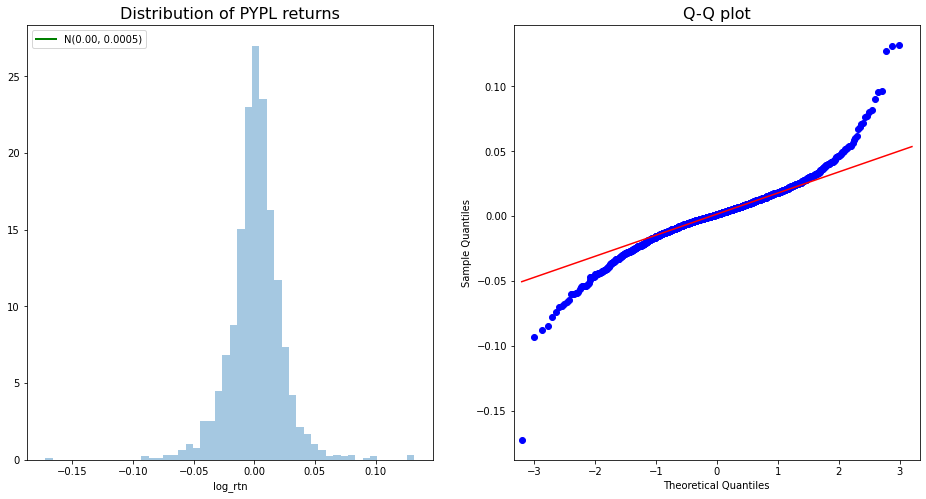

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0]) 
ax[0].set_title(f'Distribution of {ticker} returns', fontsize=16) 
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')
ax[0].legend(loc='upper left');

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='q', ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize = 16)